# In class Assignment- 
Analyzing your `time sheet` using Pandas, Matplotlib and Seaborn modules.Save this file as InClassAssignment_Timesheet_xxxx where xxxx will be your initials
- Name:Sawyer Mason
- Date: 02/15/2024
- Version: V2

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Load the dataset and save it to a dataframe named 'df'
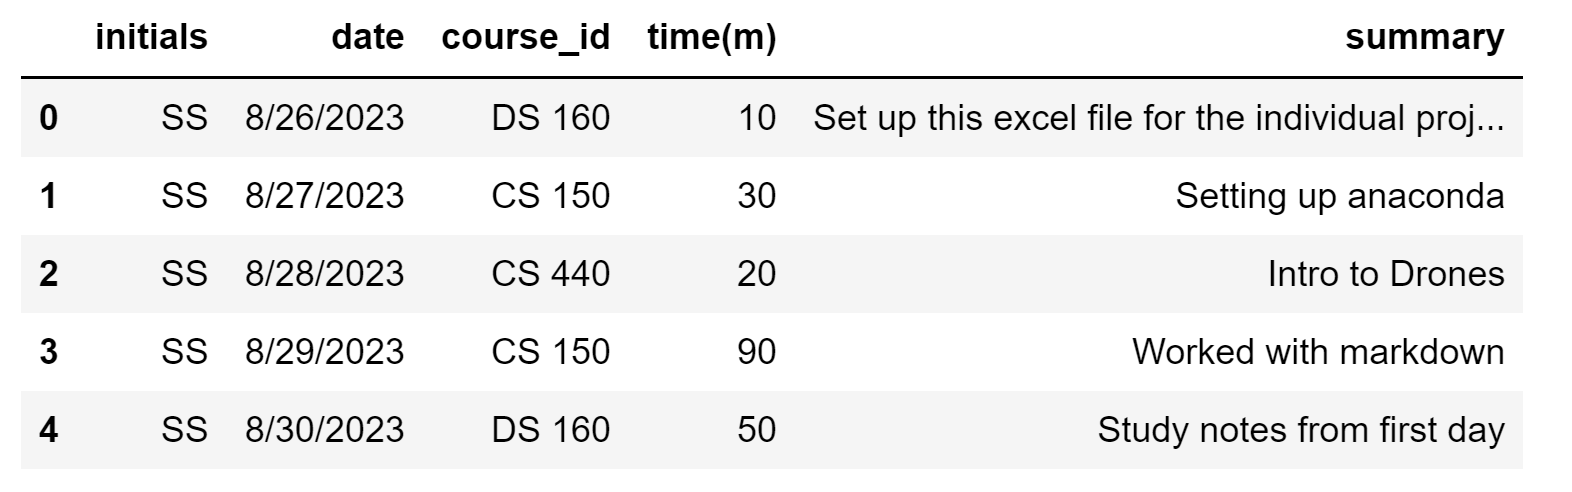

In [33]:
# loaded sample data due to an error in my time sheet formatting.
df=pd.read_csv("TS_Data1.csv")

### Investigate your dataset (head, tail, info)
- How many entries in your dataset?
- Is there any missing value?
- What are the data types?

In [34]:
# top 5 entires
df.head()

,Innitials,date,course_id,time(m),Summary,Unnamed: 5
0,SM,1/8/24,ECON-232,50,Class,NaN
1,SM,1/9/24,DS-160,75,Class,NaN
2,SM,1/9/24,IDC-401,200,Class,NaN
3,SM,1/10/24,ECON-232,55,Class,NaN
4,SM,1/10/24,Work,240,Shift,NaN


In [35]:
# bottom 5 entires
df.tail()

,Innitials,date,course_id,time(m),Summary,Unnamed: 5
55,SM,2/13/24,IDC-401,20,HW,NaN
56,SM,2/13/24,DS-160,10,HW,NaN
57,SM,2/14/24,ECON-232,50,Class,NaN
58,SM,2/14/24,DS-160,10,HW,NaN
59,SM,2/14/24,Work,295,Shift,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Innitials   60 non-null     object 
 1   date        60 non-null     object 
 2   course_id   60 non-null     object 
 3   time(m)     60 non-null     int64  
 4   Summary     60 non-null     object 
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.9+ KB


In [37]:
df.isnull().sum()

Innitials      0
date           0
course_id      0
time(m)        0
Summary        0
Unnamed: 5    60
dtype: int64

In [9]:
# total of 60 entries, with 5 columns, one is reading that is blank
# there are no missing values in the data set, other than the blank column
# there are 4 objects and one set of integers being the time in minutes

### Summary Statistics
Calculate basic statistics for the 'Time (minutes)' column, such as mean, median, minimum, and maximum. This will give you an overview of how time is distributed across activities. use table and graphical representations (sample below)
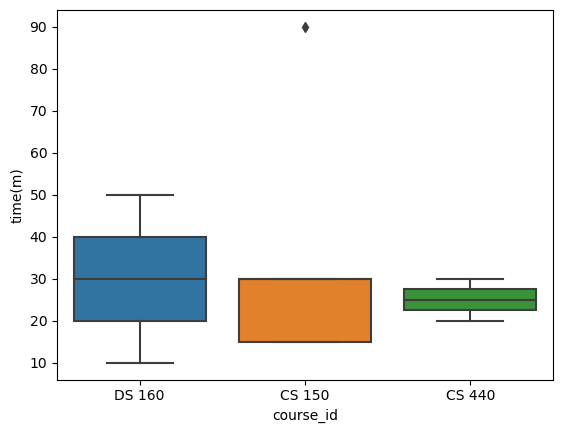

In [38]:
# summary stats for time
df.describe()
# will remove the unnamed column in future

,time(m),Unnamed: 5
count,60.000000,0.0
mean,165.116667,NaN
std,130.249707,NaN
min,10.000000,NaN
25%,50.000000,NaN
50%,95.000000,NaN
75%,296.250000,NaN
max,485.000000,NaN


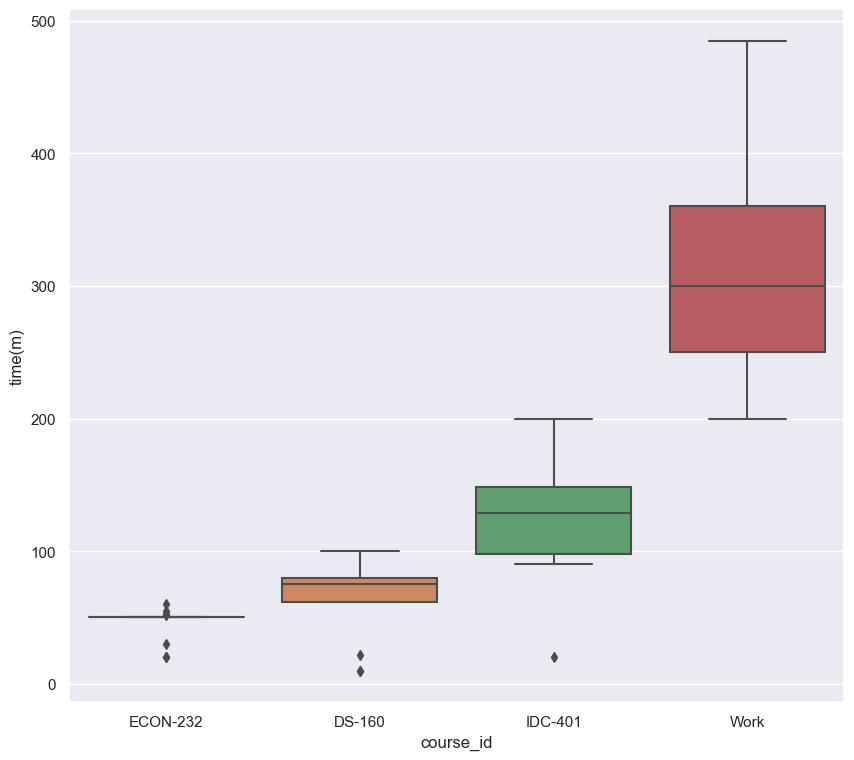

In [39]:
sns.boxplot(x="course_id",
            y="time(m)",
           data=df)
plt.show()

### Create two new columns "day" and "day_name" using the "Date" column in which the day will represent the range of days (sample below)
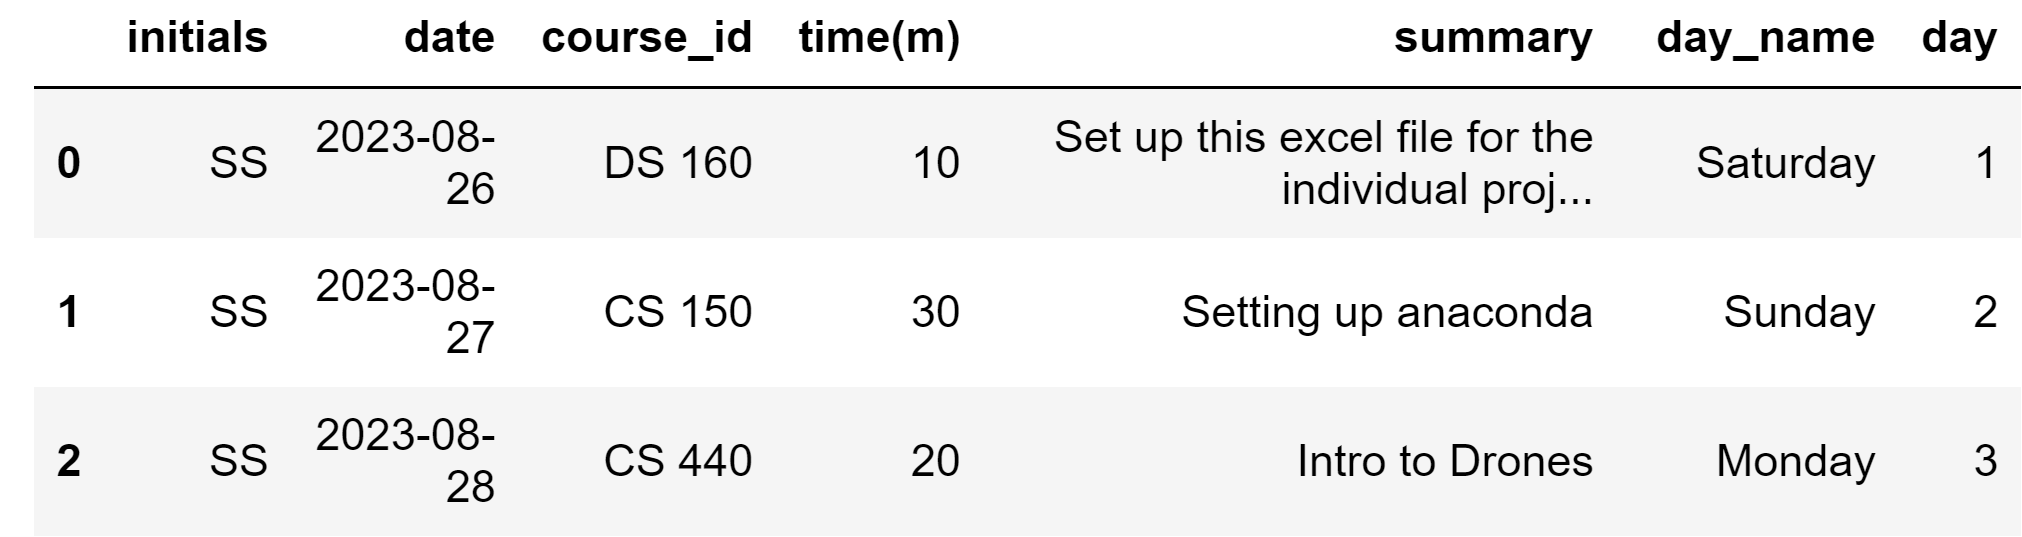
- df['day'] = range(1, len(df) + 1)

In [40]:
df['date']=pd.to_datetime(df['date'])

In [41]:
df['day_name']=df['date'].dt.day_name()

In [42]:
df['count']=range(1,len(df)+1)

In [43]:
df.head()

,Innitials,date,course_id,time(m),Summary,Unnamed: 5,day_name,count
0,SM,2024-01-08,ECON-232,50,Class,NaN,Monday,1
1,SM,2024-01-09,DS-160,75,Class,NaN,Tuesday,2
2,SM,2024-01-09,IDC-401,200,Class,NaN,Tuesday,3
3,SM,2024-01-10,ECON-232,55,Class,NaN,Wednesday,4
4,SM,2024-01-10,Work,240,Shift,NaN,Wednesday,5


### Data Visualization:
1. Create a histogram to visually represent the distribution of time spent.
2. Create a  bar chart (sample below) to visually represent the distribution of time spent on different courses and comment on the course you spent most and least time
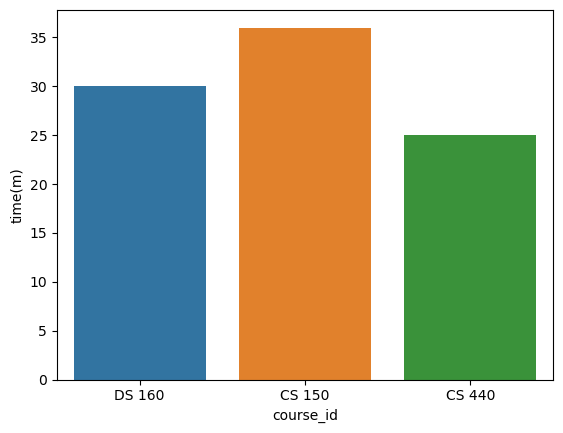

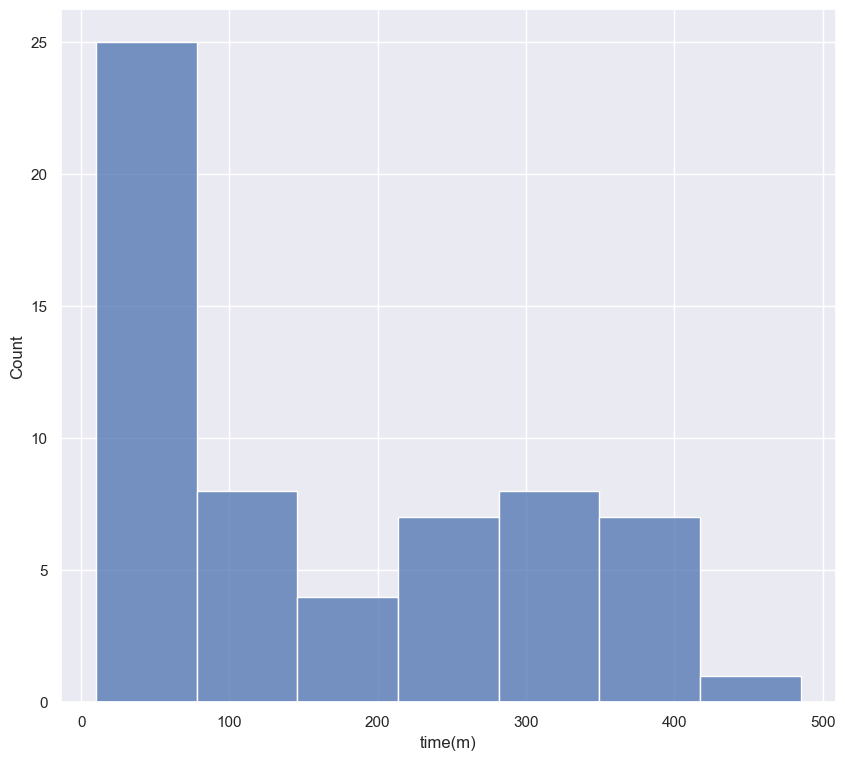

In [44]:
sns.histplot(x="time(m)",
            data=df)
plt.show()

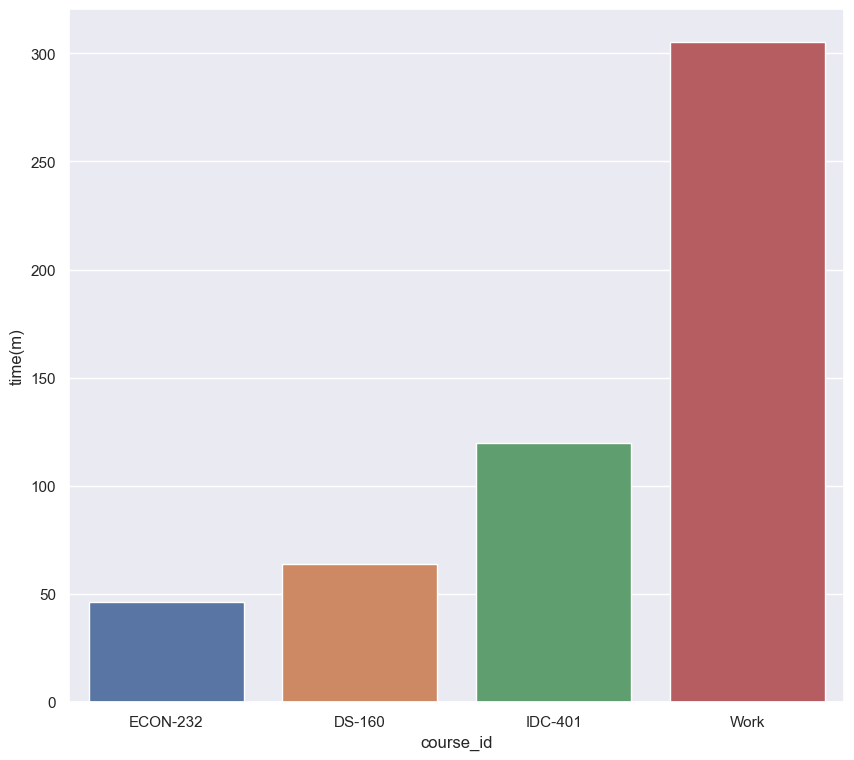

In [45]:
sns.barplot(x="course_id",
           y="time(m)",
            ci=None,
           data=df)

plt.show()

#### i have spent the most time working. beyond that, it seems that the total amount of time is reflective of how long each class typically is

### Activity Counts:

Count the occurrences of each course in the dataset to see `how often` you engaged in each.

In [47]:
df['course_id'].value_counts()

Work        25
ECON-232    17
DS-160      12
IDC-401      6
Name: course_id, dtype: int64

##### i engaged in work most often, and IDC the least often

### Time Trends:

Plot a line chart (sample below) to visualize how time spent on activities changes over the observed days.
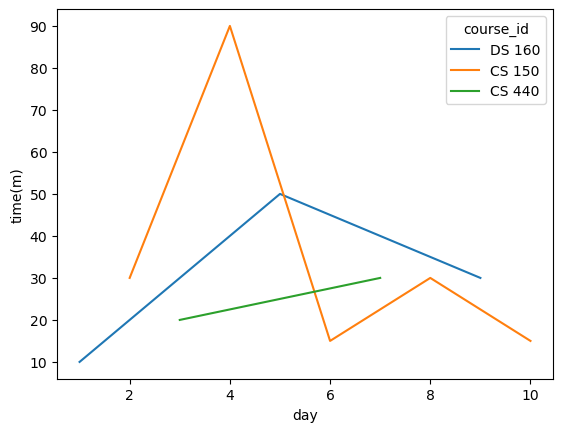

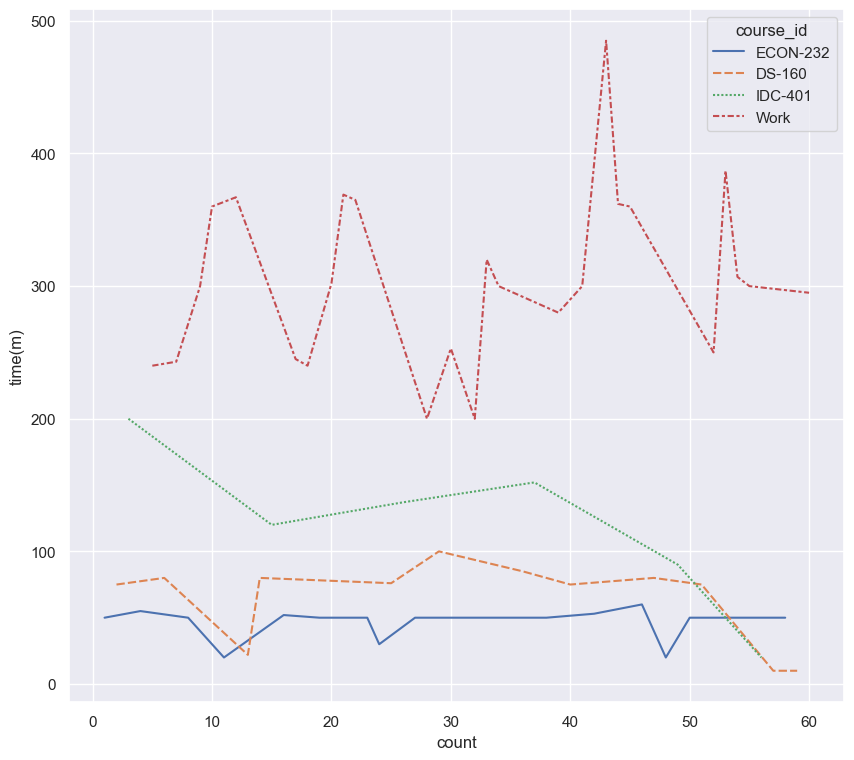

In [48]:
sns.set(rc={'figure.figsize':(10,9)})
sns.lineplot(x="count",
            y="time(m)",
            hue="course_id",
            style="course_id",
            ci=None,
            data=df)
plt.show()

### Course Analysis:

For each course ex.(DS 160, CS 150, CS 440), calculate the total time spent. Which course received the most time, and which received the least?
- Sample print statement: Total time spent on CS160: 180 min

In [49]:
df.groupby(['course_id'])['time(m)'].sum()

course_id
DS-160       768
ECON-232     790
IDC-401      719
Work        7630
Name: time(m), dtype: int64

#### by far I hace spent the most time in work which would make sense
#### each class I have spent an almost equal amount of time on with ECON-232 barely being the most
### IDC-401 was the least by about 50 minutes

### Correlations:
- Examine whether there are any correlations between the day and the time spent. For example, do you spend more time on courses over days or less (sample below).
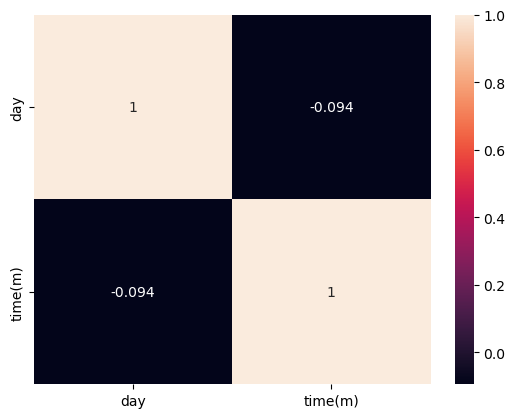

            count   time(m)
count    1.000000  0.028184
time(m)  0.028184  1.000000


<AxesSubplot:>

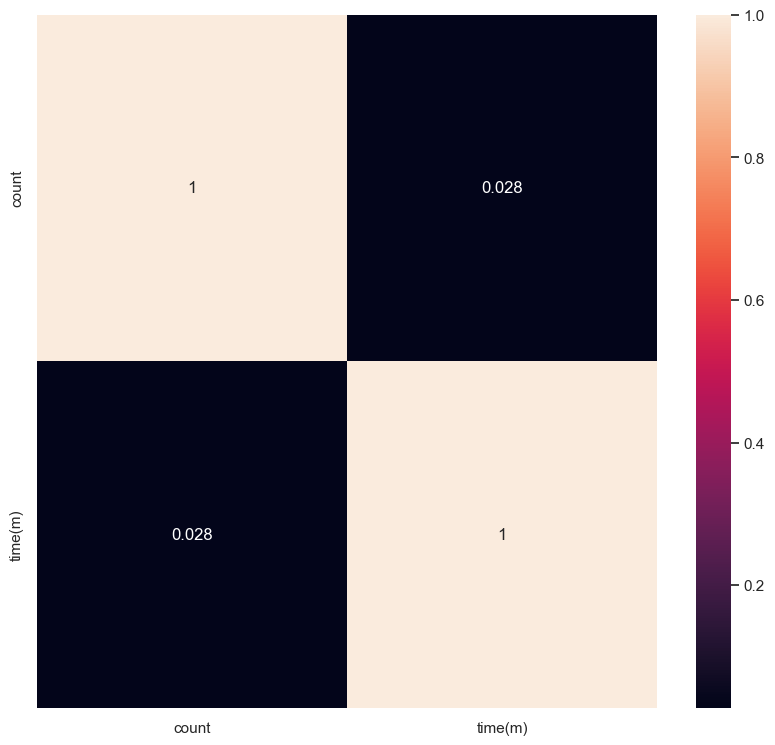

In [52]:
corr=df[['count', 
               'time(m)']].corr()
print(corr)
sns.heatmap(corr, annot=True)

### Your Reflection on the findings

#### overall, the most time being spent on work is due to me having both a part time and full time job
#### I am surprised that I have spent an almost equal amount of time on each one of my classes this semester
#### there is also a noticable drop in average time over the last week due to me being sick
#### for each of the three classes, there were some outliers, likely due to short homework assignments or small levels of at home work as seen in the boxplot.
#### once more data is collected I am curious to see how the trends/ totals of time will be presented

### Submit the work by Friday 16th end of the day